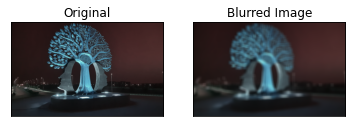

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('brain.png')

blurImg=cv.blur(img,(25,25))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blurImg),plt.title('Blurred Image')
plt.xticks([]), plt.yticks([])
plt.show()

#sharpStuff=img-blurImg
#plt.subplot(121),plt.imshow(sharpStuff),plt.title('Original')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(blurImg+sharpStuff),plt.title('Blurred Image')
#plt.xticks([]), plt.yticks([])
#plt.show()

#kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
#sharpImg = cv2.filter2D(blurImg, -1, kernel)

#plt.subplot(121),plt.imshow(blurImg),plt.title('Blurred Image')
#plt.xticks([]), plt.yticks([])
#plt.subplot(122),plt.imshow(sharpImg),plt.title('Sharp Image')
#plt.xticks([]), plt.yticks([])
#plt.show()



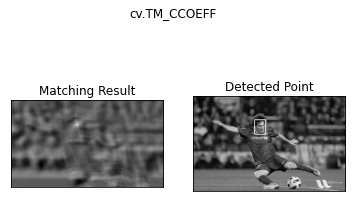

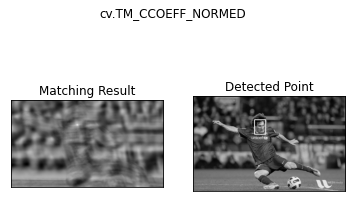

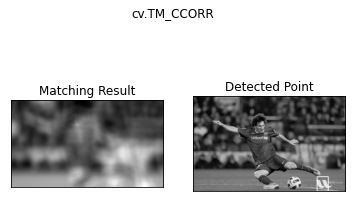

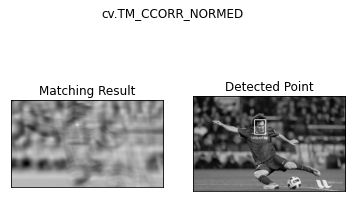

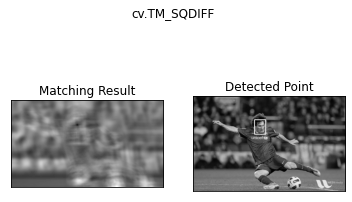

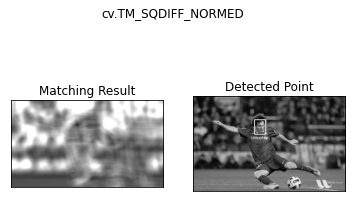

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('messi5.jpeg',0)
img2 = img.copy()
template = cv.imread('messi_face.jpeg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()


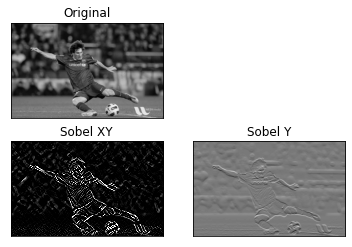

In [ ]:
#Edge detection
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('messi5.jpeg',0)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
sobelxy = cv.Sobel(img, cv.CV_64F, 1, 1, ksize=5)
ret,thresh1 = cv.threshold(sobelxy,127,255,cv.THRESH_BINARY)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray',vmin=0,vmax=255)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelxy,cmap = 'gray',vmin=0,vmax=255)
plt.title('Sobel XY'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

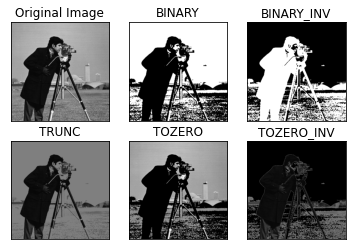

In [ ]:
#Binarization
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('cameraman.jpeg',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()